In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Defining the required parameters and variables

#We are going to build a single hidden layer neural network model with 2 input nodes, 3 hidden nodes and 2 output nodes
nn_input_dim = 2    # input layer dimension
nn_output_dim = 2   # output layer dimension

# Gradient descent parameters
lr = 0.01           # learning rate for gradient descent
reg_lambda = 0.01   # regularization strength

In [3]:
#Generating the dataset - Let's use make_moons dataset from scikit-learn
def generate_dataset():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.2)  #Total no. of points generated = 200
    return X, y

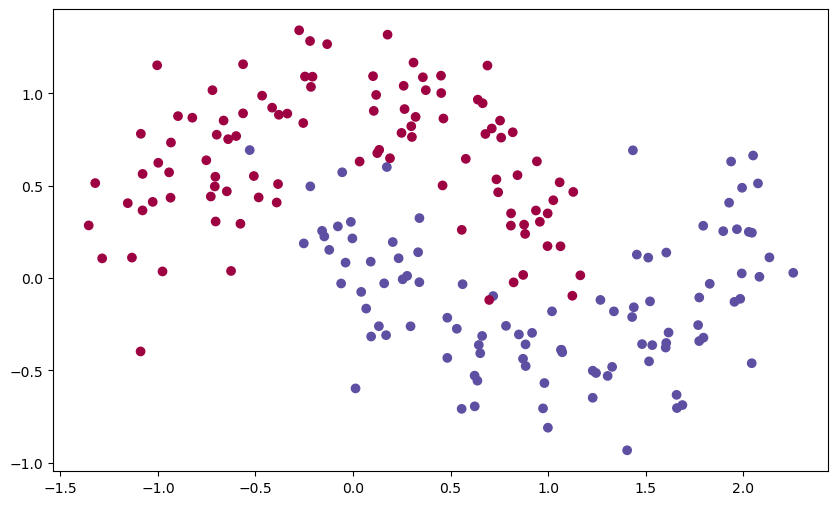

In [4]:
feature_set, labels = generate_dataset()
plt.figure(figsize=(10,6))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.Spectral)

In [5]:
#Training the model
def build_model(X, y, nn_hidden_dim): #nn_hidden_dim: hidden layer dimension
    num_examples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hidden_dim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hidden_dim))
    W2 = np.random.randn(nn_hidden_dim, nn_output_dim) / np.sqrt(nn_hidden_dim)
    b2 = np.zeros((1, nn_output_dim))
    model = {}

    # Gradient descent
    #Number of passes through the training data for gradient descent = 20000
    for i in range(0, 20000):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        #Print the loss after every 2000 iterations to check the learning progress
        if (i % 2000) == 0:
            print("Loss after iteration %i: %f" % (i, calculate_loss(model, X, y)))

    return model
     

In [6]:
#Function to evaluate total loss at a particular point in the iteration
def calculate_loss(model, X, y):
    num_examples = len(X)  # training set size
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)

    # Add regularization term to loss
    data_loss += reg_lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1.0/num_examples * data_loss

In [7]:
#Prediction function - To derive the output
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [8]:
#Plotting the decision boundary
def visualize(pred_func, X, y):
    plt.title("Binary Classification")
    # Set min and max values
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Generate a grid of points with distance h between them
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

Loss after iteration 0: 0.432387
Loss after iteration 2000: 0.068987
Loss after iteration 4000: 0.071253
Loss after iteration 6000: 0.071293
Loss after iteration 8000: 0.071308
Loss after iteration 10000: 0.071314
Loss after iteration 12000: 0.071315
Loss after iteration 14000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 18000: 0.071316


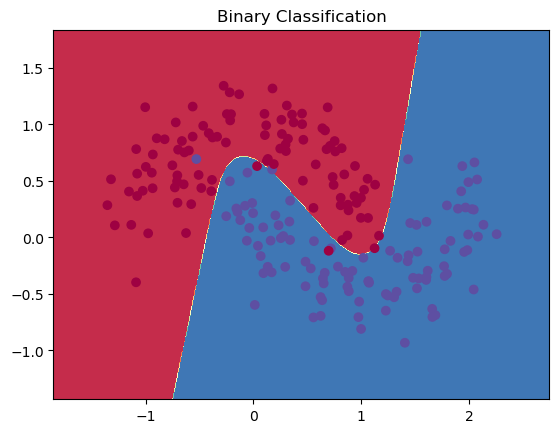

In [9]:
#Let's test our model now!
X, y = generate_dataset()
model = build_model(X, y, 3)
visualize(lambda x:predict(model,x), X, y)